In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pefile
!pip install PyGitHub
!pip install nltk
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 52.9 MB/s eta 0:00:00


# **TASK 1**

In [ ]:
import sys
import hashlib
filename = "/content/drive/MyDrive/ColabNotebooks/Lab_2/python-3.10.0-amd64.exe"
BUF_SIZE = 65536
md5 = hashlib.md5()
sha256 = hashlib.sha256()
with open(filename, "rb") as f:
 while True:
  data = f.read(BUF_SIZE)
  if not data:
    break
  md5.update(data)
  sha256.update(data)
print("MD5: {0}".format(md5.hexdigest()))
print("SHA256: {0}".format(sha256.hexdigest()))

MD5: c3917c08a7fe85db7203da6dcaa99a70
SHA256: cb580eb7dc55f9198e650f016645023e8b2224cf7d033857d12880b46c5c94ef


# **TASK 2**

## **Featurizing the PE header**

In [ ]:

# B1. Import pefile và hai thư viện
import pefile
from os import listdir
from os.path import isfile, join
directories = ["Benign PE Samples", "Malicious PE Samples"]

# B2. Định nghĩa hai phương thức thu thậo tên của sections và chuẩn hoá chúng.
def get_section_names(pe):
    """Gets a list of section names from a PE file."""
    list_of_section_names = []
    for sec in pe.sections:
        normalized_name = sec.Name.decode().replace("\x00","").lower()
        list_of_section_names.append(normalized_name)
    return list_of_section_names

# B3. Ta định nghĩa một phương thuận tiện trong tiền xử lỹ import
def preprocess_imports(list_of_DLLs):
    """Normalize the naming of the imports of a PE file."""
    return [x.decode().split(".")[0].lower() for x in list_of_DLLs]

# B4. Chúng ta định nghĩa hàm thu thập import từ tập tin
def get_imports(pe):
    """Get a list of the imports of a PE file."""
    list_of_imports = []
    for entry in pe.DIRECTORY_ENTRY_IMPORT:
        list_of_imports.append(entry.dll)
    return preprocess_imports(list_of_imports)

# B5. Cuối cùng, duyệt quá tất cả tập tin và tạo danh sách thuộc tính
imports_corpus = []
num_sections = []
section_names = []
for dataset_path in directories:
  samples = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]
  for file in samples:
    file_path = dataset_path + "/" + file
  try:
    # B6. Ngoài việc thu thập thuộc tính, ta còn thu thập số lượng section của tập tin
    pe = pefile.PE(file_path)
    imports = get_imports(pe)
    n_sections = len(pe.sections)
    sec_names = get_section_names(pe)
    imports_corpus.append(imports)
    num_sections.append(n_sections)
    section_names.append(sec_names)

# B7. Trong trường hợp không parse được tập tin PE, thêm try-catch
  except Exception as e:
    print(e)
    print("Unable to obtain imports from " + file_path)

# B8. In ra các thuộc tính đã thu thập được
print("Imports: %s" % imports_corpus)
print("The number of sections: %s" % num_sections)
print("Sections: %s" % section_names)

Imports: [['msvcrt', 'api-ms-win-core-versionansi-l1-1-1', 'api-ms-win-core-versionansi-l1-1-0', 'user32', 'kernel32', 'cabinet'], ['msvcrt', 'kernel32', 'user32', 'advapi32', 'shell32', 'uxtheme', 'gdi32', 'comctl32', 'shlwapi', 'msimg32', 'winhttp', 'gdiplus', 'ole32', 'crypt32']]
The number of sections: [5, 5]
Sections: [['.text', '.data', '.idata', '.rsrc', '.reloc'], ['.text', '.rdata', '.data', '.rsrc', '.reloc']]



## **Sinh viên cho biết quả của đoạn code trên**
Kết quả trả về như đúng mô tả, bao gồm:
- Tên các thư viện imports
- Số lượng Sections
- Tên các sections

# **TASK 3**

Thực hiện cài đặt theo link sau: https://github.com/ForeGuards/Cuckoo-Installation-Guide/blob/main/installation.txt#L186

**Lưu ý: Thực hiện tương tự, giống hoàn toàn và từng bước 1**

Sau khi cài đặt ta sẽ có giao diện như sau:
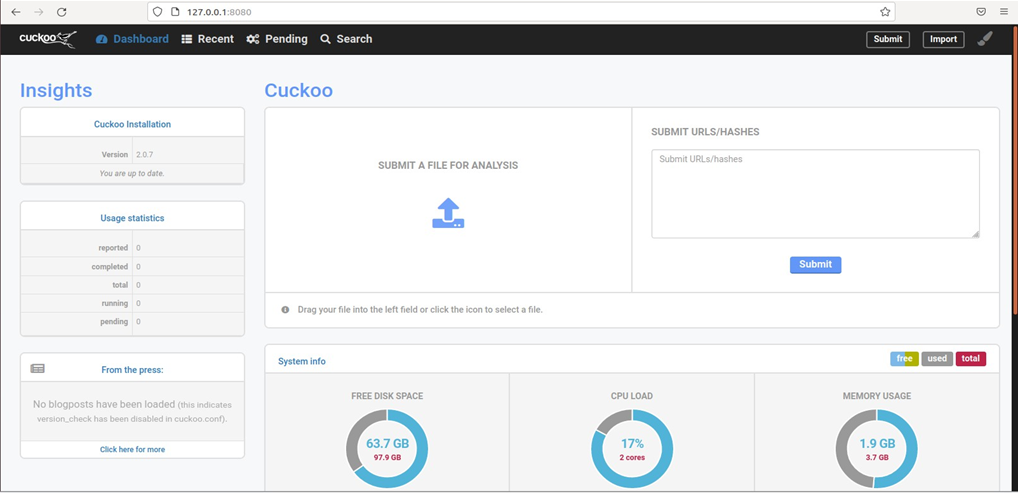

Thực hiện upload file lên, của nhóm là file python mà ta đã tải ở task trước:
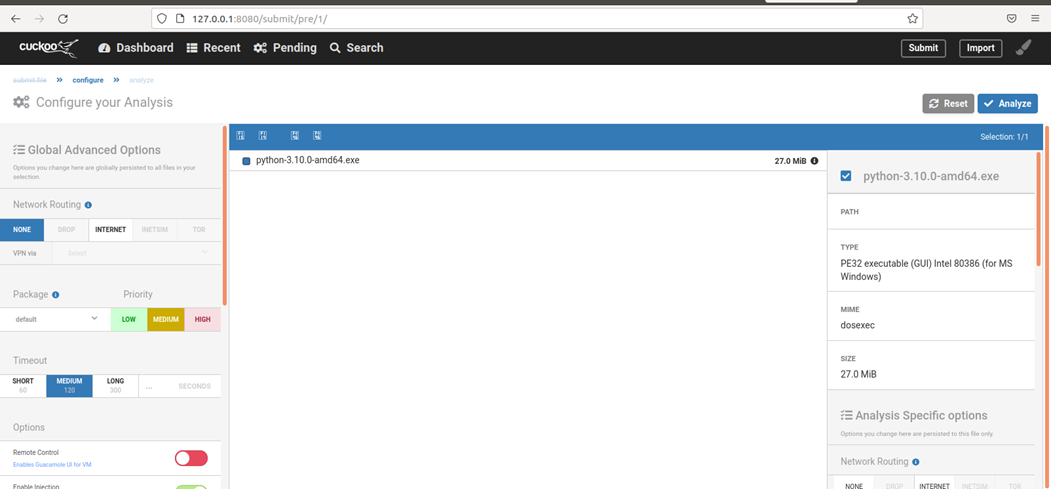

Để cho cuckoo thực hiện phân tích và ta sẽ thu được kết quả:
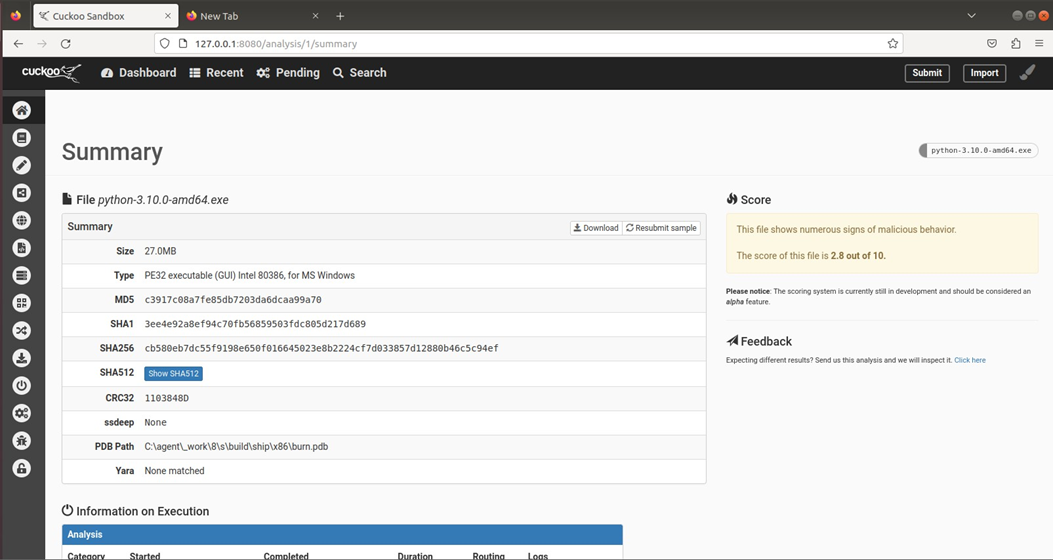

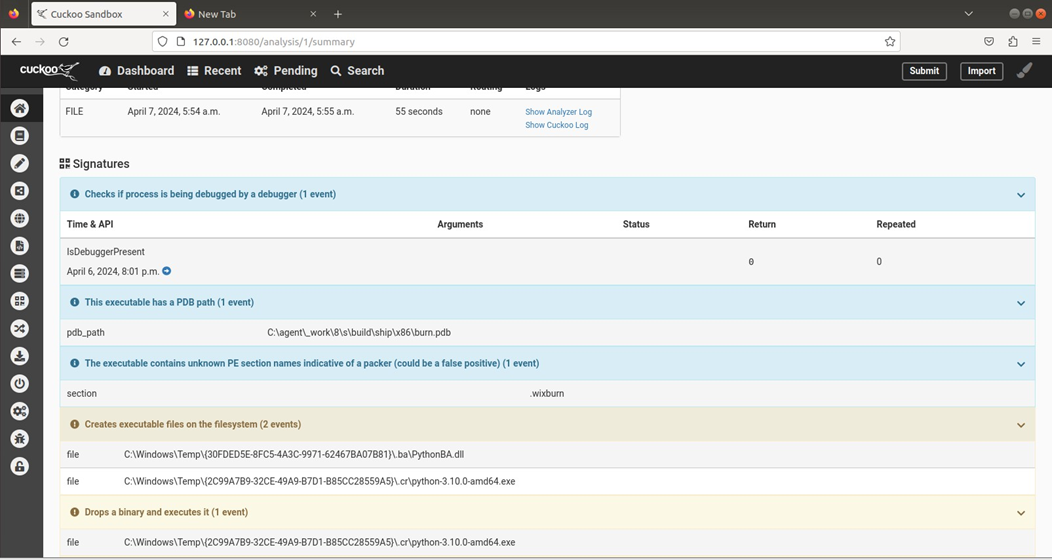

# **TASK 5**

In [ ]:
import os
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
javascript_path = "/content/drive/MyDrive/ColabNotebooks/Lab_2/JS"
python_path = "/content/drive/MyDrive/ColabNotebooks/Lab_2/Python"
powershell_path = "/content/drive/MyDrive/ColabNotebooks/Lab_2/PWS"

corpus = []
labels = []
file_types_and_labels = [(javascript_path, -1), (python_path, 0),
(powershell_path, 1)]
for files_path, label in file_types_and_labels:
  files = os.listdir(files_path)
  for file in files:
    file_path = files_path + "/" + file
    try:
      with open(file_path, "r") as myfile:
        data = myfile.read().replace("\n", "")
    except:
      pass
    data = str(data)
    corpus.append(data)
    labels.append(label)

X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.33, random_state=11)
text_clf = Pipeline(
 [
 ("vect", HashingVectorizer(input="content", ngram_range=(1,
3))),
 ("tfidf", TfidfTransformer(use_idf=True,)),
 ("rf", RandomForestClassifier(class_weight="balanced")),
 ]
)

text_clf.fit(X_train, y_train)
y_test_pred =text_clf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.9285714285714286
[[18  0  0]
 [ 3 19  0]
 [ 1  0 15]]


# **Task 7**


## **Trích xuất N-grams**

In [ ]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# B1. Import thư viện nltk
import collections
from nltk import ngrams

# B2. Chọn tập tin phân tích
file_to_analyze = "./python-3.10.0-amd64.exe"

# B3. Định nghĩa hàm đọc tập tin từ bytes
def read_file(file_path):
    """Reads in the binary sequence of a binary file."""
    with open(file_path, "rb") as binary_file:
        data = binary_file.read()
    return data

# B4. Viết một hàm lấy một chuỗi bytes thành N-grams
def byte_sequence_to_Ngrams(byte_sequence, N):
    """Creates a list of N-grams from a byte sequence."""
    Ngrams = ngrams(byte_sequence, N)
    return list(Ngrams)

#B5. Viết một hàm đọc một tập tin và lấy được N-grams của nó
def binary_file_to_Ngram_counts(file, N):
    """Takes a binary file and outputs the N-grams counts of its binary sequence."""
    filebyte_sequence = read_file(file)
    file_Ngrams = byte_sequence_to_Ngrams(filebyte_sequence, N)
    return collections.Counter(file_Ngrams)

#B6. Định nghĩa với N-4 thu được số lượng 4-grams
extracted_Ngrams = binary_file_to_Ngram_counts(file_to_analyze, 4)

# B7. Hiển thị 10 kết quả đầu 4-grams phổ biến trong tập tin
print(extracted_Ngrams.most_common(10))

[((0, 0, 0, 0), 24290), ((139, 240, 133, 246), 1920), ((32, 116, 111, 32), 1791), ((255, 255, 255, 255), 1671), ((108, 101, 100, 32), 1522), ((100, 32, 116, 111), 1519), ((97, 105, 108, 101), 1513), ((105, 108, 101, 100), 1513), ((70, 97, 105, 108), 1505), ((101, 100, 32, 116), 1503)]


## **Chọn N-grams tốt nhất**

In [ ]:
#B1. Chọn thư viện, xác đinh N và định nghĩa đường dẫn.
from os import listdir
from os.path import isfile, join
directories = ["Benign PE Samples", "Malicious PE Samples"]
N = 2

#B2. Đếm tất cả N-grams trong tập tin
Ngram_counts_all_files = collections.Counter([])
for dataset_path in directories:
 all_samples = [f for f in listdir(dataset_path) if
isfile(join(dataset_path, f))]
 for sample in all_samples:
  file_path = join(dataset_path, sample)
  Ngram_counts_all_files += binary_file_to_Ngram_counts(file_path, N)


#B3. Ta sẽ thêm với K=1000 với N-grams thường gặp
K1 = 1000
K1_most_frequent_Ngrams = Ngram_counts_all_files.most_common(K1)
K1_most_frequent_Ngrams_list = [x[0] for x in K1_most_frequent_Ngrams]

#B4. Phương thức featurize_sample sẽ sử dụng mẫu và xuất số lần xuất hiện của của N-grams phổ biến trong chuỗi bytes của nó.
def featurize_sample(sample, K1_most_frequent_Ngrams_list):
    """Takes a sample and produces a feature vector.
    The features are the counts of the K1 N-grams we've selected.
    """
    K1 = len(K1_most_frequent_Ngrams_list)
    feature_vector = K1 * [0]
    file_Ngrams = binary_file_to_Ngram_counts(sample, N)
    for i in range(K1):
        feature_vector[i] = file_Ngrams[K1_most_frequent_Ngrams_list[i]]
    return feature_vector


#B5. Dùng hàm featurize_sample duyệt qua tất cả tập tin và gán nhãn cho chúng.
directories_with_labels = [("Benign PE Samples", 0), ("Malicious PE Samples", 1)]
X = []
y = []
for dataset_path, label in directories_with_labels:
    all_samples = [f for f in listdir(dataset_path) if
isfile(join(dataset_path, f))]
    for sample in all_samples:
        file_path = join(dataset_path, sample)
        X.append(featurize_sample(file_path,
K1_most_frequent_Ngrams_list))
        y.append(label)

#B6. Import thư viện để chọn thuộc tính và số lượng thuộc tính muốn lấy
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
K2 = 10

In [ ]:
#B7. Chọn 3 kiểu để lựa chọn thuộc tính N-grams
#Frequency: Chọn N-grams phổ biến
import numpy as np
X = np.asarray(X)
X_top_K2_freq = X[:,:K2]
print("Frequency: Chọn N-grams phổ biến")
np.set_printoptions(threshold=np.inf)  # Không giới hạn số phần tử hiển thị
print(X_top_K2_freq)

Frequency: Chọn N-grams phổ biến
[[      5       5       2       3       2       2       3       0       1
        2]
 [   2250       1       0     136       0       8       2       0       1
       43]
 [   2230       1       0     134       0       8       2       0       0
       43]
 [   2399       3       0     130       0       7      26       0       0
       36]
 [  95142   14843   22617   12800   15966    9280    3908    7701    4948
     5897]
 [      7       2       2       3       1       2       0       2       1
        3]
 [ 132869   17982   28861   11566    7978   16179    4436   11802   17697
     4089]
 [ 159263    1555    3121   22337     555    2860     256    1385    1738
     1628]
 [  14368    1222    2073    1821     955    1144     319     827     665
      264]
 [      7       1       0       5       3       0       0       1       0
        1]
 [  16734    1187    2847    2793    1172    1592     248     992     937
      289]
 [   6110      61     193     12

In [ ]:
# Mutual information:  Chọn N-grams có xếp hạng cao theo thuật toán mutual information
mi_selector = SelectKBest(mutual_info_classif, k=K2)
X_top_K2_mi = mi_selector.fit_transform(X, y)
print("Mutual information:  Chọn N-grams có xếp hạng cao theo thuật toán mutual information")
np.set_printoptions(threshold=np.inf)  # Không giới hạn số phần tử hiển thị
print(X_top_K2_mi)

Mutual information:  Chọn N-grams có xếp hạng cao theo thuật toán mutual information
[[    1     1     3     2     4     1     1     1     3     1]
 [  264    77     0    37     1     0     1     0   171     0]
 [  263    77     0    37     1     0     2     0   171     0]
 [  259    82     0    29     1     0     1     0   171     0]
 [  513   220   284    92    10     1     1     0   104     1]
 [    0     0     2     0     1     1     3     0     2     1]
 [  715   253  1792    97     4     0     1     3     7     6]
 [  127  4996   274 11364    16    21 21527 15091   121 12643]
 [   67    76   121    41     0     0     0     0     0     1]
 [    0     0     0     0     1     1     0     1     0     2]
 [   98    99   120    33     0     0     0     0     0     0]
 [   50    43    33    17     0     0     0     0     0     0]
 [  123    63   206    28     1     0     1     0     0     0]
 [   47    37     0    19     3     0     0     0     0     0]
 [ 2092  1660  1182  1816    21  

In [ ]:
#Chi-squared: Chọn N-grams có xếp hạng cao theo thuật toán chi squared
chi2_selector = SelectKBest(chi2, k=K2)
X_top_K2_ch2 = chi2_selector.fit_transform(X, y)
print("Chi-squared: Chọn N-grams có xếp hạng cao theo thuật toán chi squared")
np.set_printoptions(threshold=np.inf)  # Không giới hạn số phần tử hiển thị
print(X_top_K2_ch2)


Chi-squared: Chọn N-grams có xếp hạng cao theo thuật toán chi squared
[[      5       2       2       0       4       0       1       0       0
        2]
 [   2250       0       1      65       0      11       8       0       0
        0]
 [   2230       0       1      63       0      11       8       0       0
        0]
 [   2399       0       1      39       0      16       7       0       0
        0]
 [  95142   22617       2     797       0      21      88      81      57
       29]
 [      7       2       2       3       1       0       0       0       2
        0]
 [ 132869   28861       1     870       0      33     261      75     297
       34]
 [ 159263    3121      27     121      23      47      87      70      53
       46]
 [  14368    2073       0      55       0       4      24      10      45
        2]
 [      7       0       1       0       1       0       0       0       0
        1]
 [  16734    2847       0      89       0       3      23      11      15
      

## **Sinh viên cho biết quả của đoạn code trên**
- Frequency: Mỗi hàng tương ứng với một sample, mỗi cột là số lần xuất hiện của đặc trưng (N-gram) được chọn.
- Mutual information: Ở đây, các giá trị trong vector được sắp xếp theo thứ tự các đặc trưng có mutual information cao với nhãn.
- Chi-squared: Đây là ma trận các đặc trưng được chọn dựa trên kiểm định chi-squared giữa đặc trưng và nhãn.
=> Tóm lại, Kết quả của đoạn code trên là ba ma trận đặc trưng 2D được in ra, mỗi ma trận ứng với một phương pháp chọn đặc trưng (Frequency, Mutual Information, và Chi-squared). Mỗi ma trận có số cột bằng K2 (ở đây là 10), trong đó mỗi hàng tương ứng với vector đặc trưng của một mẫu từ tập dữ liệu (các file PE benign hoặc malicious).

# **Xây dựng trình phát hiện phần mềm độc hại bằng phân tích tĩnh**

Trình phân tích này sử dụng cả 2 bộ thuộc tính trích xuất từ PE header và N-grams. Sử dụng tập dữ liệu Benign PE Samples và Malicious PE Sample.
- B1. Tạo list các mẫu và gán nhãn cho chúng.
- B2. Chia dữ liệu train-test
- B3. Các hàm lấy thuộc tính
- B4. Chọn 100 thuộc tính phổ biến với 2-grams
- B5. Trích xuất số lượng N-grams count, section names, imports và số lượng sections của mỗi mẫu trong train-test.
- B6. Sử dụng hàm băm tfidf để chuyển imports, section names từ văn bản thành dạng số
- B7. Kết hợp các vector thuộc tính thành 1 mảng.
- B8. Ta huấn luyên bằng phân loại Random Forest cho tập train
- B9. Thu thập các thuộc tính của tập test, giống như tập huấn luyện
- B10. Ta chuyển đổi vector từ thuộc tính test, và kiểm tra kết quả của trình phân loại.
# **Task 8. Sinh viên hoàn thành các bước trên**

In [ ]:
!pip install collection
!pip install ngrams

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## **B0. Import Thư Viện cần thiết**

In [ ]:
import os
import pefile
import pandas as pd
import collections
from os import listdir
from os.path import isfile, join
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk import ngrams
import collections
from nltk import ngrams
import numpy as np
import pefile


## **B1. Tạo list các mẫu và gán nhãn cho chúng.**


In [ ]:
directories_and_labels = [("./Benign PE Samples", 0), ("./Malicious PE Samples", 1)]
list_of_samples = []
labels = []
N_spec = 2 # For N-grams
for dataset_path, label in directories_and_labels:
  samples = [f for f in listdir(dataset_path)]
  for sample in samples:
    file_path = os.path.join(dataset_path, sample)
    list_of_samples.append(file_path)
    labels.append(label)
print(list_of_samples[:5]) # Get the first 5 samples
print(list_of_samples[len(list_of_samples) -5: len(list_of_samples)]) # Get the last 5 samples
print(labels[:5]) # Get the first 5 samples
print(labels[len(list_of_samples) -5: len(list_of_samples)]) # Get the last 5 samples


['./Benign PE Samples\\adamuninstall.exe', './Benign PE Samples\\AddInProcess.exe', './Benign PE Samples\\AddInProcess32.exe', './Benign PE Samples\\AddInUtil.exe', './Benign PE Samples\\AddSuggestedFoldersToLibraryDialog.exe']
['./Malicious PE Samples\\Win32.WannaPeace.exe', './Malicious PE Samples\\win33.exe', './Malicious PE Samples\\wirelesskeyview.exe', './Malicious PE Samples\\yfoye_dump.exe', './Malicious PE Samples\\{71257279-042b-371d-a1d3-fbf8d2fadffa}.exe']
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]



## **B2. Chia dữ liệu train-test**


In [ ]:
from sklearn.model_selection import train_test_split
samples_train, samples_test, target_train, target_test = train_test_split(
  list_of_samples,
  labels,
  test_size=0.3,
  stratify = labels,
  random_state = 11
)

## **B3. Các hàm lấy thuộc tính**

In [ ]:
def read_file(file_path):
  with open(file_path, "rb") as bin_file:
    data = bin_file.read()
    return data

def byte_seq_to_Ngrams(byte_seq, N_par):
  Ngrams_par = ngrams(byte_seq, N_par)
  return list(Ngrams_par)

def bin_file_to_Ngrams_count(file_path, N_par):
  file_seq = read_file(file_path)
  file_Ngrams = byte_seq_to_Ngrams(file_seq, N_par)
  return collections.Counter(file_Ngrams)

def get_Ngrams_features_from_samples(sample, K1_most_freq_Ngrams_list):
  K1 = len(K1_most_freq_Ngrams_list)
  feature_vector = K1 * [0]
  file_Ngrams = bin_file_to_Ngrams_count(sample, N_spec)
  for i in range(K1):
    feature_vector[i] = file_Ngrams[K1_most_freq_Ngrams_list[i]]
  return feature_vector

def preprocess_imports(list_of_DLLs):
  """ Normalize the name of the imports of a PE file. """
  temp = [x.decode().split(".")[0].lower() for x in list_of_DLLs] # View the transforming of below example
  return " ".join(temp)

def get_imports(pe):
  """ Get a list of the imports of a PE file """
  list_of_imports = []
  for entry in pe.DIRECTORY_ENTRY_IMPORT:
    list_of_imports.append(entry.dll)
  return preprocess_imports(list_of_imports)


def get_section_names(pe):
  """ Get a list of the section names of a PE file """
  list_of_sections = []
  for sect in pe.sections:
    normalized_name = sect.Name.decode().replace("\x00", "").lower()
    list_of_sections.append(normalized_name)
  return "".join(list_of_sections)


## **B4. Chọn 100 thuộc tính phổ biến với 2-grams**


In [ ]:
Ngrams_count_all = collections.Counter([])
for sample in samples_train:
  Ngrams_count_all += bin_file_to_Ngrams_count(sample, N_spec)
K1 = 100
K1_most_common_Ngrams = Ngrams_count_all.most_common(K1)
K1_most_common_Ngrams_list = [x[0] for x in K1_most_common_Ngrams]


## **B5. Trích xuất số lượng N-grams count, section names, imports và số lượng sections của mỗi mẫu trong train-test**

In [ ]:
imports_corpus_train = []
num_sect_train = []
sect_name_train = []
Ngram_feat_list_train = []
y_train = []

for i in range(len(samples_train)):
    sample = samples_train[i]
    try:
        Ngram_features = get_Ngrams_features_from_samples(sample, K1_most_common_Ngrams_list)
        pe = pefile.PE(sample)
        imports = get_imports(pe)
        n_sections = len(pe.sections)
        sec_names = get_section_names(pe)

        imports_corpus_train.append(imports)
        num_sect_train.append(n_sections)
        sect_name_train.append(sec_names)
        Ngram_feat_list_train.append(Ngram_features)

        y_train.append(target_train[i])
    except Exception as e:
        print(sample + ":")
        print(e)

./Benign PE Samples\iisrstas.exe:
'DOS Header magic not found.'
./Benign PE Samples\CCG.exe:
'DOS Header magic not found.'
./Benign PE Samples\hvsirdpclient.exe:
'DOS Header magic not found.'
./Benign PE Samples\lpr.exe:
'DOS Header magic not found.'
./Benign PE Samples\hcsdiag.exe:
'DOS Header magic not found.'
./Benign PE Samples\hvsimgr.exe:
'DOS Header magic not found.'
./Malicious PE Samples\wirelesskeyview.exe:
'utf-8' codec can't decode byte 0xff in position 1: invalid start byte
./Benign PE Samples\iissetup.exe:
'DOS Header magic not found.'
./Benign PE Samples\dcdiag.exe:
'DOS Header magic not found.'
./Benign PE Samples\hvsirpcd.exe:
'DOS Header magic not found.'
./Benign PE Samples\evntwin.exe:
'DOS Header magic not found.'
./Benign PE Samples\hvc.exe:
'DOS Header magic not found.'
./Benign PE Samples\bash.exe:
'DOS Header magic not found.'
./Benign PE Samples\lpq.exe:
'DOS Header magic not found.'
./Benign PE Samples\AppVStreamingUX.exe:
'PE' object has no attribute 'DIRECT

## **B6. Sử dụng hàm băm tfidf để chuyển imports, section names từ văn bản thành dạng số**

In [ ]:
imports_featurizer = Pipeline(
    [
        ("vect", HashingVectorizer(input = "content", ngram_range=(1,2))),
        ("tfidf", TfidfTransformer(use_idf = True,)),
    ]
)

sect_name_featurizer = Pipeline(
    [
        ("vect", HashingVectorizer(input = "content", ngram_range= (1,2))),
        ("tfidf", TfidfTransformer(use_idf = True))
    ]
)

imports_corpus_train_transformed = imports_featurizer.fit_transform(imports_corpus_train)
sect_name_train_transformed = sect_name_featurizer.fit_transform(sect_name_train)


## **B7. Kết hợp các vector thuộc tính thành 1 mảng.**

In [ ]:
from scipy.sparse import hstack, csr_matrix

X_train = hstack(
    [
        Ngram_feat_list_train,
        imports_corpus_train_transformed,
        sect_name_train_transformed,
        csr_matrix(num_sect_train).transpose(),
    ]
)


## **B8. Ta huấn luyện bằng phân loại Random Forest cho tập train**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators = 100)
clf = clf.fit(X_train, y_train)


## **B9. Thu thập các thuộc tính của tập test, giống như tập huấn luyện**

In [ ]:
import_corpus_test = []
num_sect_test = []
sect_names_test = []
Ngram_feat_list_test = []
y_test = []

for i in range(len(samples_test)):
    test = samples_test[i]
    try:
        Ngram_features = get_Ngrams_features_from_samples(test, K1_most_common_Ngrams_list)
        pe = pefile.PE(test)
        imports = get_imports(pe)
        n_sections = len(pe.sections)
        sec_names = get_section_names(pe)

        import_corpus_test.append(imports)
        num_sect_test.append(n_sections)
        sect_names_test.append(sec_names)
        Ngram_feat_list_test.append(Ngram_features)

        y_test.append(target_test[i])
    except Exception as e:
        print(test + ":")
        print(e)



./Benign PE Samples\LxRun.exe:
'DOS Header magic not found.'
./Benign PE Samples\c2wtshost.exe:
'DOS Header magic not found.'
./Benign PE Samples\cmak.exe:
'DOS Header magic not found.'
./Benign PE Samples\InetMgr6.exe:
'DOS Header magic not found.'
./Benign PE Samples\evntcmd.exe:
'DOS Header magic not found.'
./Benign PE Samples\ldp.exe:
'DOS Header magic not found.'
./Benign PE Samples\InspectVhdDialog.exe:
'DOS Header magic not found.'
./Benign PE Samples\eshell.exe:
'DOS Header magic not found.'
./Benign PE Samples\aspnetca.exe:
'DOS Header magic not found.'
./Benign PE Samples\InspectVhdDialog6.3.exe:
'DOS Header magic not found.'
./Benign PE Samples\InetMgr.exe:
'DOS Header magic not found.'
./Benign PE Samples\CExecSvc.exe:
'DOS Header magic not found.'
./Benign PE Samples\dplaysvr.exe:
'DOS Header magic not found.'
./Malicious PE Samples\Build.exe:
'utf-8' codec can't decode byte 0xd2 in position 6: invalid continuation byte


## **B10. Ta chuyển đổi vector từ thuộc tính test, và kiểm tra kết quả của trình phân loại.**

In [ ]:
imports_corpus_test_transformed = imports_featurizer.transform(import_corpus_test)
# Sửa lại ở đây: dùng đúng pipeline cho section names
sect_names_test_transformed = sect_name_featurizer.transform(sect_names_test)

X_test = hstack(
    [
        Ngram_feat_list_test,
        imports_corpus_test_transformed,
        sect_names_test_transformed,
        csr_matrix(num_sect_test).transpose(),
    ]
)

print("The score of our classifier is as follow: ")
print(clf.score(X_test, y_test))


The score of our classifier is as follow: 
0.9469026548672567



## **Lưu và Sử dụng Mô Hình**

In [ ]:
import joblib

# Lưu mô hình Random Forest
joblib.dump(clf, './MaliciousFilePredictor/rf_model.pkl')

# Lưu các vectorizer
joblib.dump(imports_featurizer, './MaliciousFilePredictor/imports_featurizer.pkl')
joblib.dump(sect_name_featurizer, './MaliciousFilePredictor/sect_name_featurizer.pkl')

# Lưu danh sách K1 của các N-grams phổ biến
joblib.dump(K1_most_common_Ngrams_list, './MaliciousFilePredictor/K1_most_common_Ngrams_list.pkl')

print("Các thành phần đã được lưu thành công!")

'''
Các file được lưu ( .pkl) sẽ chứa trạng thái của mô hình và các đối tượng tiền xử lý.
Khi cần sử dụng lại chúng (ví dụ sau này, hay trong một môi trường sản xuất),
ta chỉ cần tải chúng vào bộ nhớ mà không phải huấn luyện lại từ đầu.
'''


Các thành phần đã được lưu thành công!


'\nCác file được lưu ( .pkl) sẽ chứa trạng thái của mô hình và các đối tượng tiền xử lý. \nKhi cần sử dụng lại chúng (ví dụ sau này, hay trong một môi trường sản xuất), \nta chỉ cần tải chúng vào bộ nhớ mà không phải huấn luyện lại từ đầu.\n'


## **Đóng gói vào 1 Class**


In [ ]:
import joblib
import pefile
import numpy as np
from scipy.sparse import hstack, csr_matrix
from nltk import ngrams
import collections

class MaliciousFilePredictor:
    def __init__(self, model_path, imports_featurizer_path, sect_name_featurizer_path, ngram_list_path):
        # Tải các mô hình và pipeline đã huấn luyện
        self.clf = joblib.load(model_path)
        self.imports_featurizer = joblib.load(imports_featurizer_path)
        self.sect_name_featurizer = joblib.load(sect_name_featurizer_path)
        self.K1_most_common_Ngrams = joblib.load(ngram_list_path)

    def read_file(self, file_path):
        """Đọc file nhị phân và trả về chuỗi byte."""
        with open(file_path, "rb") as bin_file:
            return bin_file.read()

    def byte_seq_to_Ngrams(self, byte_seq, N_par):
        """Chuyển chuỗi byte thành các N-grams."""
        return list(ngrams(byte_seq, N_par))

    def get_Ngrams_features(self, file_path):
        """Trích xuất đặc trưng N-grams từ file."""
        file_seq = self.read_file(file_path)
        file_Ngrams = collections.Counter(self.byte_seq_to_Ngrams(file_seq, 2))
        feature_vector = [file_Ngrams.get(ngram, 0) for ngram in self.K1_most_common_Ngrams]
        return np.array(feature_vector).reshape(1, -1)

    def preprocess_imports(self, pe):
        """Tiền xử lý các thư viện nhập khẩu từ PE file."""
        imports = [entry.dll.decode().split(".")[0].lower() for entry in pe.DIRECTORY_ENTRY_IMPORT]
        return " ".join(imports)

    def preprocess_sections(self, pe):
        """Tiền xử lý tên các section trong PE file."""
        return "".join([sect.Name.decode().replace("\x00", "").lower() for sect in pe.sections])

    def get_features(self, file_path):
        """Lấy tất cả đặc trưng từ PE file."""
        pe = pefile.PE(file_path)
        n_sections = len(pe.sections)
        imports_text = self.preprocess_imports(pe)
        sect_names_text = self.preprocess_sections(pe)

        # Chuyển đổi văn bản thành đặc trưng thông qua các pipeline
        imports_features = self.imports_featurizer.transform([imports_text])
        sect_names_features = self.sect_name_featurizer.transform([sect_names_text])

        # Kết hợp tất cả đặc trưng lại thành vector cuối cùng
        ngram_features = self.get_Ngrams_features(file_path)
        final_feature_vector = hstack([
            ngram_features,
            imports_features,
            sect_names_features,
            csr_matrix([n_sections]).transpose()
        ])
        return final_feature_vector

    def predict(self, file_path):
        """Dự đoán nhãn của file PE."""
        try:
            features = self.get_features(file_path)
            pred = self.clf.predict(features)
            return pred[0]
        except Exception as e:
            return f"Error during prediction: {str(e)}"




## **Sử dụng**

In [ ]:

# Sử dụng lớp để dự đoán mẫu mới
predictor = MaliciousFilePredictor(
    model_path='./MaliciousFilePredictor/rf_model.pkl',
    imports_featurizer_path='./MaliciousFilePredictor/imports_featurizer.pkl',
    sect_name_featurizer_path='./MaliciousFilePredictor/sect_name_featurizer.pkl',
    ngram_list_path='./MaliciousFilePredictor/K1_most_common_Ngrams_list.pkl'
)
prediction_demo = predictor.predict("python-3.10.0-amd64.exe")
print(f"Nhãn dự đoán của mẫu mới: {prediction_demo}")



Nhãn dự đoán của mẫu mới: 0
